# 10 EDA and Visualizations


## 10.01 Imports


### 10.01.01 Python Imports


In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import os

import seaborn as sns
import matplotlib.pyplot as plt

### 10.01.02 Feature Film Import


In [116]:
Disney_df = pd.read_csv('../Bens_Data/Disney_Films_For_EDA.csv')

In [117]:
Disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               437 non-null    int64  
 1   index                    437 non-null    int64  
 2   DFL_title                437 non-null    object 
 3   tconst                   437 non-null    object 
 4   titleType                437 non-null    object 
 5   primaryTitle             437 non-null    object 
 6   startYear                437 non-null    int64  
 7   runtimeMinutes           437 non-null    int64  
 8   genres                   437 non-null    object 
 9   averageRating            437 non-null    float64
 10  numVotes                 437 non-null    float64
 11  newurl                   437 non-null    object 
 12  mpaarating               437 non-null    object 
 13  rlsdt                    437 non-null    object 
 14  budget                   4

**Dropping the "Unnamed: 0" column**

In [118]:
Disney_df.drop(columns=['Unnamed: 0'],inplace=True)
Disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    437 non-null    int64  
 1   DFL_title                437 non-null    object 
 2   tconst                   437 non-null    object 
 3   titleType                437 non-null    object 
 4   primaryTitle             437 non-null    object 
 5   startYear                437 non-null    int64  
 6   runtimeMinutes           437 non-null    int64  
 7   genres                   437 non-null    object 
 8   averageRating            437 non-null    float64
 9   numVotes                 437 non-null    float64
 10  newurl                   437 non-null    object 
 11  mpaarating               437 non-null    object 
 12  rlsdt                    437 non-null    object 
 13  budget                   437 non-null    object 
 14  worldwide                4

Not a terribly helpful heatmat.  But definitely some highs and lows.

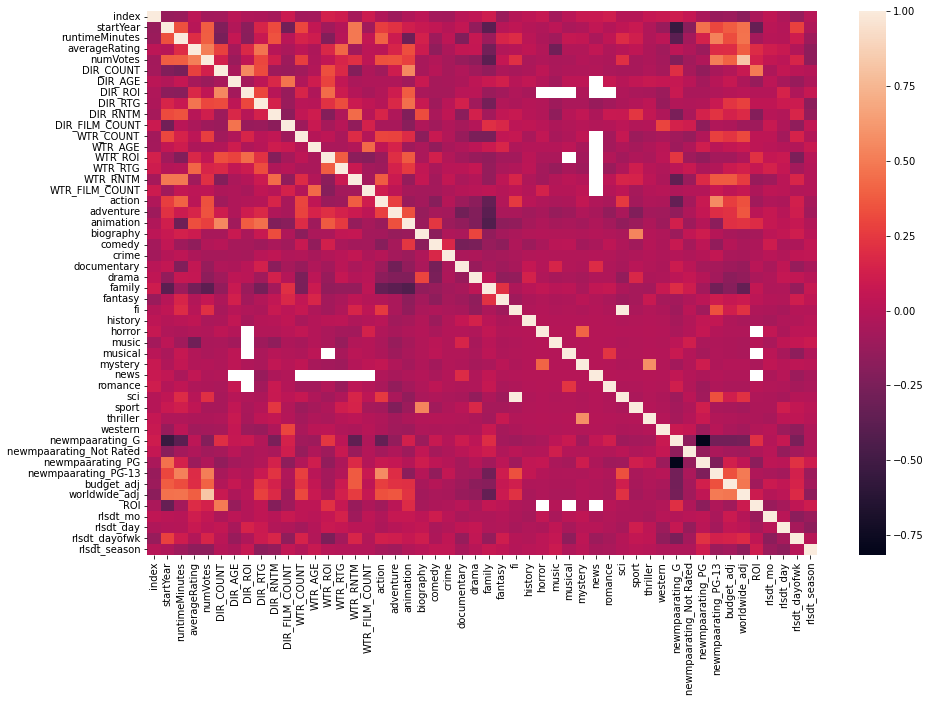

In [119]:
plt.figure(figsize=(15, 10))
sns.heatmap(Disney_df.corr());

## 10.02 Explore Missing Data

### 10.02.01 Missing Director Counts

In [120]:
Disney_df[Disney_df.DIR_COUNT.isnull()]

,index,DFL_title,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,budget_adj,worldwide_adj,ROI,rlsdt_dt,rlsdt_mo,rlsdt_day,rlsdt_daynm,rlsdt_dayofwk,rlsdt_season,rlsdt_season_NM
183,184,Mr. Toad's Wild Ride,tt0118172,movie,Mr. Toad's Wild Ride,1996,88,"Adventure,Comedy,Family",6.3,3243.0,...,0,0,NaN,1997-10-31,10.0,31.0,Friday,6.0,3.0,Fall
316,318,The Great Muppet Caper,tt0082474,movie,The Great Muppet Caper,1981,97,"Adventure,Comedy,Crime",7.1,15222.0,...,0,31206251,NaN,1981-06-26,6.0,26.0,Friday,6.0,1.0,Spring
404,406,Trail of the Panda,tt1247700,movie,Trail of the Panda,2009,87,"Adventure,Family",6.3,206.0,...,0,686970,NaN,2009-01-01,1.0,1.0,Thursday,5.0,4.0,Winter
419,421,Waking Sleeping Beauty,tt1159961,movie,Waking Sleeping Beauty,2009,86,"Documentary,Drama,History",7.6,2994.0,...,0,84918,NaN,2010-10-06,10.0,6.0,Wednesday,4.0,3.0,Fall


In [121]:
# Manually Checking some director data
directors_df = pd.read_csv('../Bens_Data/directors_demo_history.csv')
directors_df.drop(columns=['Unnamed: 0'], inplace=True)

In [122]:
directors_df.head()

,nconst,director,primaryName,birthYear,tconst,category,primaryTitle,runtimeMinutes,genres,mpaarating,...,rlsdt_mo,rlsdt_day,rlsdt_daynm,budget_adj,worldwide_adj,ROI,averageRating,numVotes,_merge,age
0,nm0000110,director,Kenneth Branagh,1960.0,tt0113403,director,A Midwinter's Tale,99.0,Comedy,R,...,2.0,16.0,Friday,0.0,469571.0,inf,7.2,2577.0,both,35.0
1,nm0000110,director,Kenneth Branagh,1960.0,tt0450972,director,As You Like It,127.0,"Comedy,Drama,Romance",PG,...,9.0,21.0,Friday,0.0,563162.0,inf,6.1,3354.0,both,46.0
2,nm0000110,director,Kenneth Branagh,1960.0,tt0475331,director,The Magic Flute,135.0,"Drama,Musical,Romance",error,...,12.0,13.0,Wednesday,27000000.0,2000853.0,-0.925894,6.5,1236.0,both,46.0
3,nm0000110,director,Kenneth Branagh,1960.0,tt0800369,director,Thor,115.0,"Action,Adventure,Fantasy",PG-13,...,5.0,6.0,Friday,150000000.0,449326618.0,1.995511,7.0,810857.0,both,51.0
4,nm0000110,director,Kenneth Branagh,1960.0,tt12789558,director,Belfast,98.0,"Biography,Drama,History",PG-13,...,11.0,12.0,Friday,0.0,46922870.0,inf,7.3,44239.0,both,61.0


In [123]:
directors_df[directors_df['tconst'] == "tt0118172"]

,nconst,director,primaryName,birthYear,tconst,category,primaryTitle,runtimeMinutes,genres,mpaarating,...,rlsdt_mo,rlsdt_day,rlsdt_daynm,budget_adj,worldwide_adj,ROI,averageRating,numVotes,_merge,age


In [124]:
directors_df[directors_df['tconst'] == "tt0082474"]

,nconst,director,primaryName,birthYear,tconst,category,primaryTitle,runtimeMinutes,genres,mpaarating,...,rlsdt_mo,rlsdt_day,rlsdt_daynm,budget_adj,worldwide_adj,ROI,averageRating,numVotes,_merge,age


In [125]:
directors_df[directors_df['tconst'] == "tt1247700"]

,nconst,director,primaryName,birthYear,tconst,category,primaryTitle,runtimeMinutes,genres,mpaarating,...,rlsdt_mo,rlsdt_day,rlsdt_daynm,budget_adj,worldwide_adj,ROI,averageRating,numVotes,_merge,age


In [126]:
directors_df[directors_df['tconst'] == "tt1159961"]

,nconst,director,primaryName,birthYear,tconst,category,primaryTitle,runtimeMinutes,genres,mpaarating,...,rlsdt_mo,rlsdt_day,rlsdt_daynm,budget_adj,worldwide_adj,ROI,averageRating,numVotes,_merge,age


All 4 of these films are infact missing from the Director information we were given by IMDB.  With more time, we could go back and add them in manually.  For now, we will drop those rows.

In [127]:
Disney_df.drop(Disney_df[Disney_df['tconst'] == "tt0118172"].index, inplace = True)
Disney_df.drop(Disney_df[Disney_df['tconst'] == "tt0082474"].index, inplace = True)
Disney_df.drop(Disney_df[Disney_df['tconst'] == "tt1247700"].index, inplace = True)
Disney_df.drop(Disney_df[Disney_df['tconst'] == "tt1159961"].index, inplace = True)
Disney_df.drop(Disney_df[Disney_df['tconst'] == "tt1049413"].index, inplace = True)


In [128]:
Disney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 436
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    431 non-null    int64  
 1   DFL_title                431 non-null    object 
 2   tconst                   431 non-null    object 
 3   titleType                431 non-null    object 
 4   primaryTitle             431 non-null    object 
 5   startYear                431 non-null    int64  
 6   runtimeMinutes           431 non-null    int64  
 7   genres                   431 non-null    object 
 8   averageRating            431 non-null    float64
 9   numVotes                 431 non-null    float64
 10  newurl                   431 non-null    object 
 11  mpaarating               431 non-null    object 
 12  rlsdt                    431 non-null    object 
 13  budget                   431 non-null    object 
 14  worldwide                4

### 10.02.02 Missing Director Age

In [129]:
Disney_df[Disney_df.DIR_AGE.isnull()]

,index,DFL_title,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,budget_adj,worldwide_adj,ROI,rlsdt_dt,rlsdt_mo,rlsdt_day,rlsdt_daynm,rlsdt_dayofwk,rlsdt_season,rlsdt_season_NM
18,18,Aliens of the Deep,tt0417415,movie,Aliens of the Deep,2005,100,"Documentary,Family",6.4,3003.0,...,0,12775590,NaN,2005-08-25,8.0,25.0,Thursday,5.0,2.0,Summer
20,20,America's Heart and Soul,tt0381006,movie,America's Heart & Soul,2004,84,Documentary,5.0,679.0,...,0,314402,NaN,2004-07-02,7.0,2.0,Friday,6.0,2.0,Summer
59,59,Cheetah,tt0097053,movie,Cheetah,1989,83,"Adventure,Drama,Family",5.9,1041.0,...,5000000,8153677,0.630735,1989-08-18,8.0,18.0,Friday,6.0,2.0,Summer
72,72,D2: The Mighty Ducks,tt0109520,movie,D2: The Mighty Ducks,1994,106,"Comedy,Drama,Family",6.1,39971.0,...,0,45610410,NaN,1994-03-25,3.0,25.0,Friday,6.0,4.0,Winter
73,73,D3: The Mighty Ducks,tt0116000,movie,D3: The Mighty Ducks,1996,104,"Action,Comedy,Drama",5.4,26748.0,...,0,22955097,NaN,1996-10-04,10.0,4.0,Friday,6.0,3.0,Fall
78,78,Do Dooni Chaar,tt1714832,movie,Do Dooni Chaar,2010,112,"Comedy,Crime,Drama",7.5,5492.0,...,0,0,NaN,2010-10-08,10.0,8.0,Friday,6.0,3.0,Fall
98,98,Flubber,tt0119137,movie,Flubber,1997,93,"Comedy,Family,Sci-Fi",5.3,88447.0,...,80000000,177977226,1.224715,1997-11-26,11.0,26.0,Wednesday,4.0,3.0,Fall
100,100,Frank and Ollie,tt0113104,movie,Frank and Ollie,1995,89,Documentary,7.7,903.0,...,0,0,NaN,1995-10-20,10.0,20.0,Friday,6.0,3.0,Fall
105,105,George of the Jungle,tt0119190,movie,George of the Jungle,1997,92,"Action,Adventure,Comedy",5.5,76283.0,...,55000000,174463257,2.172059,1997-07-16,7.0,16.0,Wednesday,4.0,2.0,Summer
108,108,Glory Road,tt0385726,movie,Glory Road,2006,118,"Biography,Drama,Sport",7.2,45510.0,...,0,42938449,NaN,2006-01-13,1.0,13.0,Friday,6.0,4.0,Winter


In [130]:
Disney_df.DIR_AGE.describe() 

count    387.000000
mean      47.354608
std        8.941016
min       24.500000
25%       41.000000
50%       47.000000
75%       53.000000
max       72.000000
Name: DIR_AGE, dtype: float64

<AxesSubplot:>

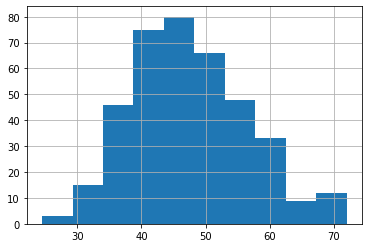

In [131]:
Disney_df.DIR_AGE.hist()

This distribution looks slightly left skewed, so maybe we use the median, rather than the mean for Dir Age. Given more time, we would research each Director and manually fill in the missing data.

In [132]:
Disney_df['DIR_AGE'].isnull().sum()

44

In [133]:
Disney_df['DIR_AGE'].mean(), Disney_df['DIR_AGE'].median()

(47.354608096468574, 47.0)

In [134]:
Disney_df['DIR_AGE'].fillna(Disney_df['DIR_AGE'].median(), inplace=True)

In [135]:
Disney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 436
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    431 non-null    int64  
 1   DFL_title                431 non-null    object 
 2   tconst                   431 non-null    object 
 3   titleType                431 non-null    object 
 4   primaryTitle             431 non-null    object 
 5   startYear                431 non-null    int64  
 6   runtimeMinutes           431 non-null    int64  
 7   genres                   431 non-null    object 
 8   averageRating            431 non-null    float64
 9   numVotes                 431 non-null    float64
 10  newurl                   431 non-null    object 
 11  mpaarating               431 non-null    object 
 12  rlsdt                    431 non-null    object 
 13  budget                   431 non-null    object 
 14  worldwide                4

### 10.02.02 Missing Director ROI

In [136]:
Disney_df.DIR_ROI.describe() 

C:\Users\benro\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    281.000000
mean            inf
std             NaN
min       -1.000000
25%        0.858899
50%        5.281887
75%             NaN
max             inf
Name: DIR_ROI, dtype: float64

This is all super ugly.  It probably would be super useful information but a third of it is missing.  We're going to drop this column

In [137]:
Disney_df.drop(columns=["DIR_ROI"], inplace=True)

### 10.02.04 Missing Director Previous Ratings

In [138]:
Disney_df.DIR_RTG.describe() 

count    325.000000
mean       6.584294
std        0.711974
min        2.900000
25%        6.133333
50%        6.505556
75%        7.041667
max        8.500000
Name: DIR_RTG, dtype: float64

In [139]:
Disney_df.DIR_RTG.isnull().sum()

106

<AxesSubplot:>

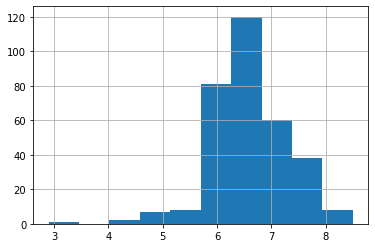

In [140]:
Disney_df.DIR_RTG.hist()

In [141]:
Disney_df.DIR_RTG.mean(), Disney_df.DIR_RTG.median()

(6.584294088531414, 6.505555555555556)

In [142]:
Disney_df['DIR_RTG'].fillna(Disney_df['DIR_RTG'].mean(), inplace=True)

In [143]:
Disney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 436
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    431 non-null    int64  
 1   DFL_title                431 non-null    object 
 2   tconst                   431 non-null    object 
 3   titleType                431 non-null    object 
 4   primaryTitle             431 non-null    object 
 5   startYear                431 non-null    int64  
 6   runtimeMinutes           431 non-null    int64  
 7   genres                   431 non-null    object 
 8   averageRating            431 non-null    float64
 9   numVotes                 431 non-null    float64
 10  newurl                   431 non-null    object 
 11  mpaarating               431 non-null    object 
 12  rlsdt                    431 non-null    object 
 13  budget                   431 non-null    object 
 14  worldwide                4

### 10.02.05 Missing Director Previous Runtimes

In [144]:
Disney_df.DIR_RNTM.isnull().sum()

107

In [145]:
Disney_df.DIR_RNTM.describe()

count    324.000000
mean      97.234034
std       17.963670
min       47.000000
25%       87.000000
50%       95.750000
75%      106.062500
max      284.000000
Name: DIR_RNTM, dtype: float64

<AxesSubplot:>

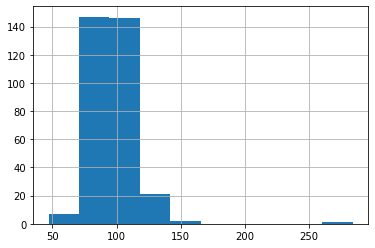

In [146]:
Disney_df.DIR_RNTM.hist()

In [147]:
Disney_df.DIR_RNTM.mean(), Disney_df.DIR_RNTM.median()

(97.2340339581622, 95.75)

This would have also been neat to include, but there is too much missing and the values are quite spread apart.  Dropping this column.

In [148]:
Disney_df.drop(columns=["DIR_RNTM"], inplace=True)

In [149]:
Disney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 436
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    431 non-null    int64  
 1   DFL_title                431 non-null    object 
 2   tconst                   431 non-null    object 
 3   titleType                431 non-null    object 
 4   primaryTitle             431 non-null    object 
 5   startYear                431 non-null    int64  
 6   runtimeMinutes           431 non-null    int64  
 7   genres                   431 non-null    object 
 8   averageRating            431 non-null    float64
 9   numVotes                 431 non-null    float64
 10  newurl                   431 non-null    object 
 11  mpaarating               431 non-null    object 
 12  rlsdt                    431 non-null    object 
 13  budget                   431 non-null    object 
 14  worldwide                4

### 10.02.06 Missing Writer Counts

In [150]:
Disney_df.WTR_COUNT.isnull().sum()

27

In [151]:
Disney_df.WTR_COUNT.describe()

count    404.000000
mean       2.811881
std        1.259902
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: WTR_COUNT, dtype: float64

<AxesSubplot:>

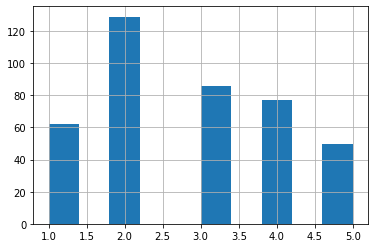

In [152]:
Disney_df.WTR_COUNT.hist()

In [153]:
Disney_df.WTR_COUNT.mean(), Disney_df.WTR_COUNT.median()

(2.8118811881188117, 3.0)

In [154]:
Disney_df['WTR_COUNT'].fillna(Disney_df['WTR_COUNT'].median(), inplace=True)

### 10.02.07 Missing Writer Age

In [155]:
Disney_df.WTR_AGE.isnull().sum()

68

In [156]:
Disney_df.WTR_AGE.describe()

count    363.000000
mean      62.109091
std       29.971794
min       25.000000
25%       45.000000
50%       54.500000
75%       67.200000
max      221.000000
Name: WTR_AGE, dtype: float64

<AxesSubplot:>

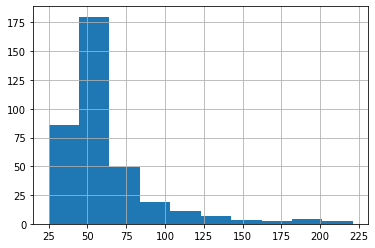

In [157]:
Disney_df.WTR_AGE.hist()

In [158]:
Disney_df.WTR_AGE.mean(), Disney_df.WTR_AGE.median()

(62.109090909090924, 54.5)

#### The data looks left skewed so we're going to use the median, rather than the mean.

In [159]:
Disney_df['WTR_AGE'].fillna(Disney_df['WTR_AGE'].median(), inplace=True)

### 10.02.08 Missing Writer ROI, Ratings, and Runtimes

All of this would have also been fun to add in but there is too much missing data to impute and not enough time to research each manually.  Dropping these columns instead.

In [160]:
Disney_df.drop(columns=["WTR_ROI"], inplace=True)
Disney_df.drop(columns=["WTR_RTG"], inplace=True)
Disney_df.drop(columns=["WTR_RNTM"], inplace=True)

### 10.02.09 Missing Writer Previous Film Counts

In [161]:
Disney_df.WTR_FILM_COUNT.isnull().sum()

27

In [162]:
Disney_df.WTR_FILM_COUNT.describe()

count    404.000000
mean       5.638614
std       11.429929
min        0.000000
25%        0.000000
50%        1.000000
75%        5.000000
max       88.000000
Name: WTR_FILM_COUNT, dtype: float64

<AxesSubplot:>

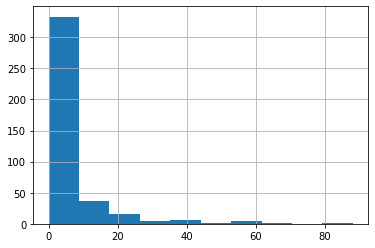

In [163]:
Disney_df.WTR_FILM_COUNT.hist()

In [164]:
Disney_df.WTR_FILM_COUNT.mean(), Disney_df.WTR_FILM_COUNT.median()

(5.638613861386139, 1.0)

The data looks left skewed so we're going to use the median, rather than the mean.

In [165]:
Disney_df['WTR_FILM_COUNT'].fillna(Disney_df['WTR_FILM_COUNT'].median(), inplace=True)

In [166]:
Disney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 436
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    431 non-null    int64  
 1   DFL_title                431 non-null    object 
 2   tconst                   431 non-null    object 
 3   titleType                431 non-null    object 
 4   primaryTitle             431 non-null    object 
 5   startYear                431 non-null    int64  
 6   runtimeMinutes           431 non-null    int64  
 7   genres                   431 non-null    object 
 8   averageRating            431 non-null    float64
 9   numVotes                 431 non-null    float64
 10  newurl                   431 non-null    object 
 11  mpaarating               431 non-null    object 
 12  rlsdt                    431 non-null    object 
 13  budget                   431 non-null    object 
 14  worldwide                4

### 10.02.10 Missing Subject ROI

In [167]:
Disney_df.ROI.isnull().sum()

174

In [168]:
Disney_df.ROI.describe()

count    257.000000
mean       3.422078
std        9.164383
min       -1.000000
25%        0.394596
50%        1.684266
75%        3.738577
max      122.365901
Name: ROI, dtype: float64

In [169]:
Disney_df.ROI.value_counts()

-1.000000    20
 3.275857     1
-0.654762     1
 2.367657     1
 0.723482     1
             ..
 3.907703     1
 0.493368     1
 3.258047     1
 0.462021     1
 5.827474     1
Name: ROI, Length: 238, dtype: int64

The "inf" from above are calculcation errors that need to come out.  That would mean removing 174 of our 430+, or around 40%.  
Let's take a look at correlations to ROI and to the IMDB Rating.

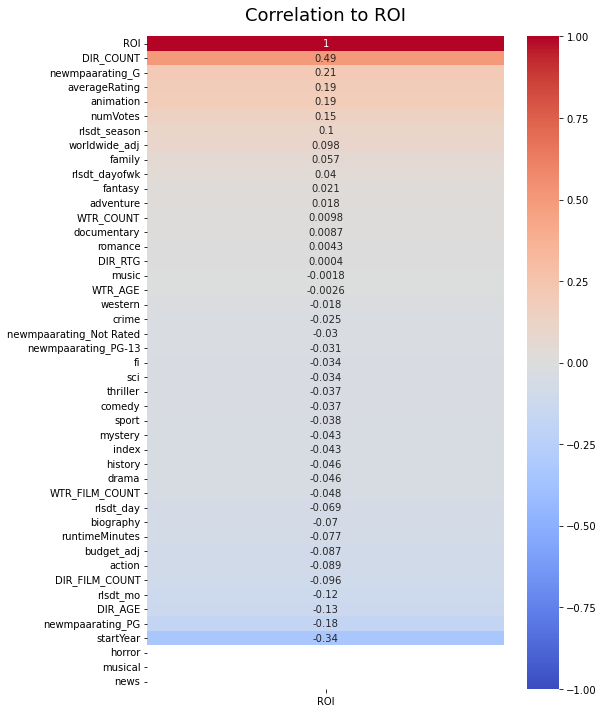

In [170]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(Disney_df.corr()[['ROI']].sort_values(by='ROI', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation to ROI', fontdict={'fontsize':18}, pad=16);

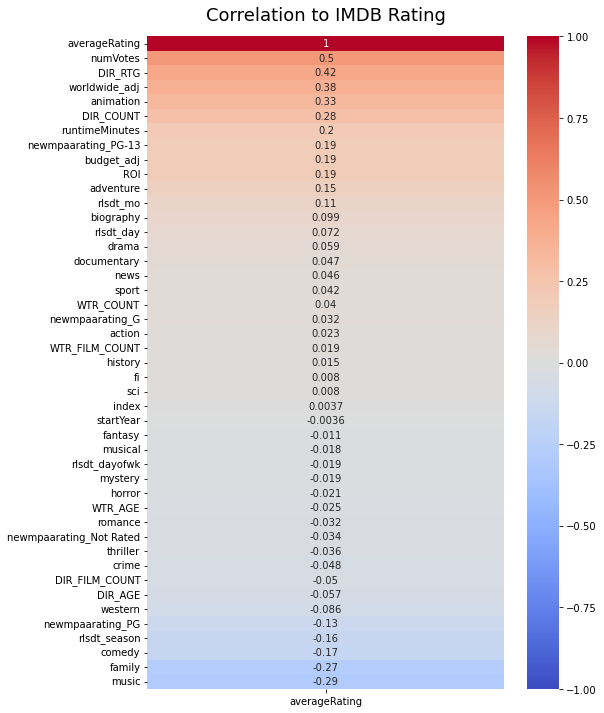

In [171]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(Disney_df.corr()[['averageRating']].sort_values(by='averageRating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation to IMDB Rating', fontdict={'fontsize':18}, pad=16);

We seem to get stronger correlations when we use Average IMDB Rating vs ROI, though there seems to be some correlation between the IMDB Rating and ROI themselves.  We're going to build two models, one where IMDB Rating is the target, and one where ROI is the target.

## 10.03 Explore Data and Correlations


Now that we've dealt with missing values, let's take a deeper look at some of the data.

 Some relationships we'd like to see include:
 - High / Low IMDB Rating
 - High / Low Worldwide Adj
 - High / Low Runtime
 - High / Low Budget
 - High / Low Director Count
 - Budget compared to Worldwide Rev
 - Worldwide Rev by Season
 - IMDB Rtg by Season
 - ROI Rtg by Season
 - Budget by Dir Age
 - Worldwide Rev by Dir Age
 - IMDB Rtg by Dir Age
 - ROI Rtg by Dir Age
 - Budget by Genres
 - Worldwide Rev by Genrese
 - IMDB Rtg by Genres
 - ROI Rtg by Genres
 - Budget by Year
 - Worldwide Rev by Year
 - IMDB Rtg by Year
 - ROI Rtg by Year

- TOP 10 / BOTTOM 10 IMDB Rating

In [172]:
Disney_df[['DFL_title','averageRating','mpaarating','worldwide_adj']].sort_values('averageRating', ascending=False).head(10)  

,DFL_title,averageRating,mpaarating,worldwide_adj
30,Avengers: Infinity War,8.5,PG-13,2048359754
331,The Lion King,8.5,G,1063611805
29,Avengers: Endgame,8.4,PG-13,2797501328
66,Coco,8.4,PG,807817888
420,Wall-E,8.4,G,521311890
151,Like Stars On Earth,8.4,PG,21897373
402,Toy Story 3,8.3,G,1066970811
400,Toy Story,8.3,G,394436586
95,Finding Nemo,8.2,G,940352645
135,Inside Out,8.2,PG,858848019


In [173]:
Disney_df[['DFL_title','averageRating','mpaarating','worldwide_adj']].sort_values('averageRating', ascending=False).tail(10)  

,DFL_title,averageRating,mpaarating,worldwide_adj
303,The Country Bears,4.2,G,18012097
9,A Wrinkle in Time,4.2,PG,132675864
27,Artemis Fowl,4.2,PG,0
136,Inspector Gadget,4.1,PG,134403112
435,Zokkomon,4.1,PG,3000
168,Meet The Deedles,4.0,PG,4356216
182,Mr. Magoo,4.0,PG,21437192
39,Beverly Hills Chihuahua,3.9,PG,149292488
112,Hannah Montana & Miley Cyrus: Best of Both Wor...,2.6,G,70642966
143,Jonas Brothers: The Concert Experience,1.7,G,23186960


- TOP 10 / BOTTOM 10 Worldwide Rev

In [174]:
Disney_df[['DFL_title','averageRating','mpaarating','worldwide_adj']].sort_values('worldwide_adj', ascending=False).head(10)  

,DFL_title,averageRating,mpaarating,worldwide_adj
29,Avengers: Endgame,8.4,PG-13,2797501328
30,Avengers: Infinity War,8.5,PG-13,2048359754
332,The Lion King,6.9,PG,1662899439
161,Marvel's Avengers: Age of Ultron,7.3,PG-13,1402809540
42,Black Panther,7.3,PG-13,1347597973
36,Beauty and the Beast,7.1,PG,1273576220
134,Incredibles 2,7.6,PG,1243089244
163,Marvel's Iron Man 3,7.2,PG-13,1214811252
52,Captain America: Civil War,7.8,PG-13,1153337496
53,Captain Marvel,6.8,PG-13,1128462972


In [175]:
worldwide_not_zero = Disney_df[Disney_df['worldwide_adj'] > 0]

In [176]:
worldwide_not_zero[['tconst','DFL_title','averageRating','mpaarating','worldwide_adj']].sort_values('worldwide_adj', ascending=False).tail(10)  

,tconst,DFL_title,averageRating,mpaarating,worldwide_adj
282,tt2081266,The Adventures of Huck Finn,5.8,PG,1217451
109,tt0054944,Greyfriars Bobby: The True Story of a Dog,7.3,Approved,721203
20,tt0381006,America's Heart and Soul,5.0,PG,314402
181,tt1198405,Morning Light,5.8,PG,275776
430,tt1222816,Wings of Life,7.4,G,192467
88,tt0120659,Endurance,6.3,G,137124
297,tt1015971,The Boys: The Sherman Brothers' Story,7.7,PG,55513
421,tt1223150,Walt & El Grupo,6.4,PG,20521
81,tt0033563,Dumbo,7.3,G,3731
435,tt1605790,Zokkomon,4.1,PG,3000


- TOP 10 / BOTTOM 10 Run Time

In [177]:
Disney_df[['DFL_title','runtimeMinutes','averageRating','mpaarating','worldwide_adj']].sort_values('runtimeMinutes', ascending=False).head(10)  

,DFL_title,runtimeMinutes,averageRating,mpaarating,worldwide_adj
29,Avengers: Endgame,181,8.4,PG-13,2797501328
215,Pirates of the Caribbean: At World's End,169,7.1,PG-13,960996492
151,Like Stars On Earth,165,8.4,PG,21897373
216,Pirates of the Caribbean: Dead Man's Chest,151,7.4,PG-13,1066179747
338,The Lone Ranger,150,6.4,PG-13,260502115
301,The Chronicles of Narnia: Prince Caspian,150,6.5,PG,419665568
30,Avengers: Infinity War,149,8.5,PG-13,2048359754
52,Captain America: Civil War,147,7.8,PG-13,1153337496
219,Pirates of the Caribbean: The Curse of the Bla...,143,8.1,PG-13,654264015
63,"Chronicles of Narnia: The Lion, the Witch and ...",143,6.9,PG,745013115


In [178]:
Disney_df[['DFL_title','runtimeMinutes','averageRating','mpaarating','worldwide_adj']].sort_values('runtimeMinutes', ascending=False).tail(10)  

,DFL_title,runtimeMinutes,averageRating,mpaarating,worldwide_adj
145,Jungle Cat,69,7.3,Approved,0
336,The Living Desert,69,7.4,G,0
283,The Adventures Of Ichabod And Mr. Toad,68,6.9,Approved,0
329,The Legend of Lobo,67,6.8,Approved,0
432,Winnie the Pooh: A Very Merry Pooh Year,65,6.6,G,0
81,Dumbo,64,7.3,G,3731
431,Winnie the Pooh (2011),63,7.2,G,49871429
107,Ghosts of the Abyss,61,6.8,G,27570076
392,The Young Black Stallion,50,5.4,G,9645304
434,Yellowstone Cubs,48,6.9,Not Rated,0


- TOP 10 / BOTTOM 10 Budget/Revenue By Director Count

In [179]:
Disney_df[['DFL_title','DIR_COUNT','averageRating','mpaarating','worldwide_adj']].sort_values('averageRating', ascending=False).head(10)  

,DFL_title,DIR_COUNT,averageRating,mpaarating,worldwide_adj
30,Avengers: Infinity War,2.0,8.5,PG-13,2048359754
331,The Lion King,2.0,8.5,G,1063611805
29,Avengers: Endgame,2.0,8.4,PG-13,2797501328
66,Coco,2.0,8.4,PG,807817888
420,Wall-E,1.0,8.4,G,521311890
151,Like Stars On Earth,1.0,8.4,PG,21897373
402,Toy Story 3,1.0,8.3,G,1066970811
400,Toy Story,1.0,8.3,G,394436586
95,Finding Nemo,2.0,8.2,G,940352645
135,Inside Out,2.0,8.2,PG,858848019


In [180]:
Disney_df[['DFL_title','DIR_COUNT','averageRating','mpaarating','worldwide_adj']].sort_values('DIR_COUNT', ascending=False).head(10)  

,DFL_title,DIR_COUNT,averageRating,mpaarating,worldwide_adj
33,Bambi,6.0,7.3,G,267447150
258,Snow White and the Seven Dwarfs,6.0,7.6,Approved,184925486
214,Pinocchio,6.0,7.5,G,121892045
81,Dumbo,6.0,7.3,G,3731
92,Fantasia 2000,6.0,7.1,G,90874570
91,Fantasia,6.0,7.7,G,76411819
155,Make Mine Music,5.0,6.2,Passed,0
310,The Fox and the Hound,5.0,7.3,G,63456988
255,Sleeping Beauty (1959),5.0,7.3,G,51600000
362,The Reluctant Dragon,5.0,6.8,Approved,0


<AxesSubplot:>

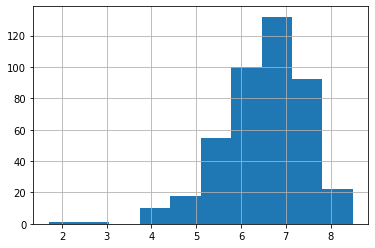

In [181]:
Disney_df['averageRating'].hist()

In [182]:
Disney_df['averageRating'].mean(), Disney_df['averageRating'].median()

(6.504640371229701, 6.6)

- TOP 10 / BOTTOM 10 Budget/Revenue By Director Age

In [183]:
Disney_df[['DFL_title','DIR_AGE','averageRating','mpaarating','worldwide_adj']].sort_values('averageRating', ascending=False).head(10)  

,DFL_title,DIR_AGE,averageRating,mpaarating,worldwide_adj
30,Avengers: Infinity War,47.5,8.5,PG-13,2048359754
331,The Lion King,38.5,8.5,G,1063611805
29,Avengers: Endgame,48.5,8.4,PG-13,2797501328
66,Coco,50.0,8.4,PG,807817888
420,Wall-E,43.0,8.4,G,521311890
151,Like Stars On Earth,47.0,8.4,PG,21897373
402,Toy Story 3,43.0,8.3,G,1066970811
400,Toy Story,38.0,8.3,G,394436586
95,Finding Nemo,37.0,8.2,G,940352645
135,Inside Out,51.5,8.2,PG,858848019


In [184]:
Disney_df[['DFL_title','DIR_AGE','averageRating','mpaarating','worldwide_adj']].sort_values('DIR_AGE', ascending=False).head(10)  

,DFL_title,DIR_AGE,averageRating,mpaarating,worldwide_adj
340,The Many Adventures of Winnie the Pooh,72.00,7.5,G,0
372,The Shaggy D.A.,71.00,5.8,G,0
310,The Fox and the Hound,70.25,7.3,G,63456988
207,One of Our Dinosaurs Is Missing,70.00,5.9,G,0
290,The BFG,70.00,6.4,PG,195243411
350,The Nutcracker and the Four Realms,70.00,5.5,PG,173961069
361,The Princess Diaries 2: Royal Engagement,70.00,5.8,G,134734481
117,Herbie Rides Again,69.00,5.7,G,38229000
324,The Island at the Top of the World,69.00,6.2,G,0
242,Robin Hood,68.50,7.5,G,0


In [185]:
Disney_df[['DFL_title','DIR_AGE','averageRating','mpaarating','worldwide_adj']].sort_values('DIR_AGE', ascending=False).tail(10)  

,DFL_title,DIR_AGE,averageRating,mpaarating,worldwide_adj
42,Black Panther,32.0,7.3,PG-13,1347597973
281,The Adventures of Huck Finn,31.0,6.2,PG,24103594
385,The Tigger Movie,31.0,6.3,G,96159800
298,The Brave Little Toaster,31.0,7.3,G,0
409,Tron,31.0,6.8,PG,33000525
70,Cool Runnings,30.0,7.0,PG,154856263
35,Beauty and the Beast,29.5,8.1,G,424967620
10,Adventures in Babysitting,29.0,6.9,PG-13,34368475
347,The Muppet Christmas Carol,29.0,7.7,G,32574382
171,Midnight Madness,24.5,6.3,PG,2900000


- TOP 10 / BOTTOM 10 Budget/Revenue By Director Rating History

In [186]:
Disney_df[['DFL_title','DIR_RTG','averageRating','mpaarating','worldwide_adj']].sort_values('DIR_RTG', ascending=False).head(10)  

,DFL_title,DIR_RTG,averageRating,mpaarating,worldwide_adj
435,Zokkomon,8.500000,4.1,PG,3000
178,Monsters University,8.300000,7.3,G,743559645
66,Coco,8.125000,8.4,PG,807817888
323,The Incredibles,8.100000,8.1,PG,631607053
230,Ratatouille,8.100000,8.1,G,623726085
321,The Hunchback of Notre Dame,8.100000,7.0,G,325338851
402,Toy Story 3,8.066667,8.3,G,1066970811
140,James and the Giant Peach,8.000000,6.7,PG,28946127
141,John Carter,7.933333,6.6,PG-13,284139100
398,Tomorrowland,7.925000,6.4,PG,209035668


In [187]:
Disney_df[['DFL_title','DIR_RTG','averageRating','mpaarating','worldwide_adj']].sort_values('DIR_RTG', ascending=False).tail(10)  

,DFL_title,DIR_RTG,averageRating,mpaarating,worldwide_adj
7,A Kid In King Arthur's Court,5.100000,4.7,PG,13406717
430,Wings of Life,5.000000,7.4,G,192467
257,Snow Dogs,4.980000,5.2,PG,115035090
244,RocketMan,4.800000,5.9,PG,15448043
274,Tarzan,4.800000,4.8,PG,44095996
305,The Devil and Max Devlin,4.800000,5.0,PG,16000000
143,Jonas Brothers: The Concert Experience,4.600000,1.7,G,23186960
70,Cool Runnings,4.466667,7.0,PG,154856263
246,Santa Paws 2: The Santa Pups,4.400000,4.9,G,0
136,Inspector Gadget,2.900000,4.1,PG,134403112


- TOP 10 / BOTTOM 10 Budget/Revenue By Director Previous Film Count

In [188]:
Disney_df[['DFL_title','DIR_FILM_COUNT','averageRating','mpaarating','worldwide_adj']].sort_values('averageRating', ascending=False).head(10)  

,DFL_title,DIR_FILM_COUNT,averageRating,mpaarating,worldwide_adj
30,Avengers: Infinity War,5.0,8.5,PG-13,2048359754
331,The Lion King,0.0,8.5,G,1063611805
29,Avengers: Endgame,6.0,8.4,PG-13,2797501328
66,Coco,4.0,8.4,PG,807817888
420,Wall-E,2.0,8.4,G,521311890
151,Like Stars On Earth,0.0,8.4,PG,21897373
402,Toy Story 3,3.0,8.3,G,1066970811
400,Toy Story,0.0,8.3,G,394436586
95,Finding Nemo,1.0,8.2,G,940352645
135,Inside Out,0.0,8.2,PG,858848019


In [189]:
Disney_df[['DFL_title','DIR_FILM_COUNT','averageRating','mpaarating','worldwide_adj']].sort_values('DIR_FILM_COUNT', ascending=False).head(10)  

,DFL_title,DIR_FILM_COUNT,averageRating,mpaarating,worldwide_adj
276,Ten Who Dared,142.0,5.5,Not Rated,0
422,"Westward Ho, The Wagons!",139.0,5.8,Approved,0
396,Toby Tyler,62.0,6.9,Approved,0
373,The Shaggy Dog,60.0,6.5,Approved,0
22,Angels in the Outfield,44.0,7.1,Approved,0
372,The Shaggy D.A.,41.0,5.8,G,0
207,One of Our Dinosaurs Is Missing,40.0,5.9,G,0
324,The Island at the Top of the World,39.0,6.2,G,0
117,Herbie Rides Again,38.0,5.7,G,38229000
339,The Love Bug,36.0,6.5,G,51264022


In [190]:
Disney_df[['DFL_title','DIR_FILM_COUNT','averageRating','mpaarating','worldwide_adj']].sort_values('DIR_FILM_COUNT', ascending=False).tail(10)  

,DFL_title,DIR_FILM_COUNT,averageRating,mpaarating,worldwide_adj
220,Planes,0.0,5.7,PG,239258712
353,The Other Side of Heaven,0.0,6.3,PG,4760014
181,Morning Light,0.0,5.8,PG,275776
100,Frank and Ollie,0.0,7.7,PG,0
184,Mulan,0.0,7.6,G,304320254
349,The North Avenue Irregulars,0.0,6.7,G,0
348,The Muppets,0.0,7.1,PG,165184237
347,The Muppet Christmas Carol,0.0,7.7,G,32574382
291,The Big Green,0.0,5.5,PG,17736619
371,The Secret of The Magic Gourd,0.0,5.1,G,3130137


## 10.04 Visualizations


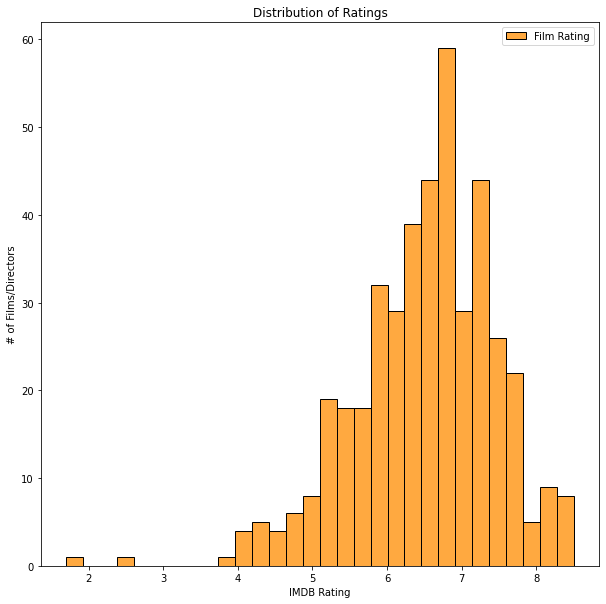

In [191]:
plt.figure(figsize=(10,10))

sns.histplot(data=Disney_df,bins = 30, x="averageRating", color='darkorange',label='Film Rating').set(title='Distribution of Ratings',xlabel='IMDB Rating',ylabel='# of Films/Directors')
# sns.histplot(data=Disney_df, bins =30, x="DIR_RTG", color='skyblue',label='Director Historical Rating')

plt.legend()
plt.show();

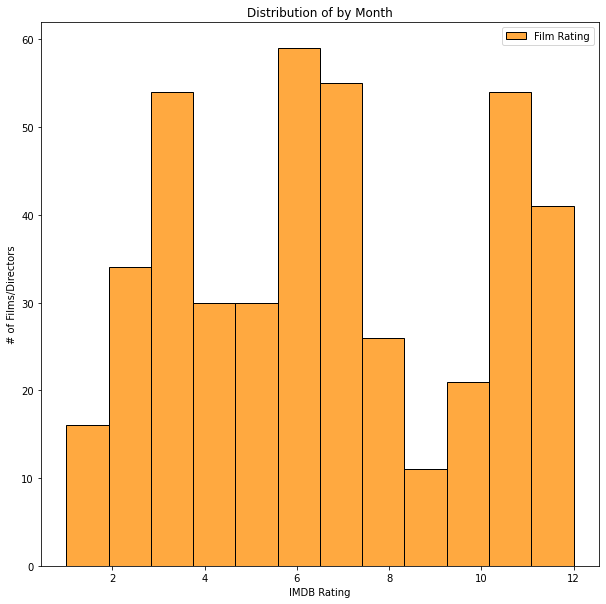

In [192]:
plt.figure(figsize=(10,10))

sns.histplot(data=Disney_df,bins = 12, x="rlsdt_mo", color='darkorange',label='Film Rating').set(title='Distribution of by Month',xlabel='IMDB Rating',ylabel='# of Films/Directors')
# sns.histplot(data=Disney_df, bins =30, x="DIR_RTG", color='skyblue',label='Director Historical Rating')



plt.legend()
plt.show();




For the sake of time, we're going to do some more exploring and visualizations in Tablaeu.
<br>
https://public.tableau.com/views/DisneyFilmAnalysisupdated04_13_22/ReleasebyYear?:language=en-US&:display_count=n&:origin=viz_share_link

In [ ]:
Disney_df.to_csv('../Bens_Data/Disney_Films_For_Visual.csv')